In [3]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='9620cb06-05f0-416a-8f30-21ea4cf4b9c0', project_access_token='p-854689085ee935b116f8ac2d642b970a9dc31a30')
pc = project.project_context


# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - TNT

<hr>

## Installing Libs

In [8]:
!pip install scikit-learn --upgrade

     |████████████████████████████████| 6.8MB 9.5MB/s eta 0:00:01
     |████████████████████████████████| 307kB 49.2MB/s eta 0:00:01
ERROR: autoai-libs 1.10.5 has requirement numpy>=1.16.4, but you'll have numpy 1.15.4 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement pandas>=0.24.2, but you'll have pandas 0.24.1 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement scikit-learn==0.20.3, but you'll have scikit-learn 0.23.2 which is incompatible.
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


In [9]:
!pip install tensorflow --upgrade

     |████████████████████████████████| 320.4MB 132kB/s  eta 0:00:01
     |████████████████████████████████| 460kB 47.9MB/s eta 0:00:01
     |████████████████████████████████| 71kB 31.4MB/s eta 0:00:01
     |████████████████████████████████| 20.1MB 34.0MB/s eta 0:00:01
     |████████████████████████████████| 2.9MB 45.8MB/s eta 0:00:01
     |████████████████████████████████| 51kB 27.8MB/s eta 0:00:01
     |████████████████████████████████| 26.1MB 47.1MB/s eta 0:00:01
     |████████████████████████████████| 61kB 30.0MB/s eta 0:00:01
     |████████████████████████████████| 6.8MB 44.0MB/s eta 0:00:01
     |████████████████████████████████| 102kB 36.4MB/s ta 0:00:01
     |████████████████████████████████| 788kB 45.5MB/s eta 0:00:01
     |████████████████████████████████| 788kB 47.0MB/s eta 0:00:01
     |████████████████████████████████| 163kB 50.9MB/s eta 0:00:01
     |████████████████████████████████| 51kB 25.7MB/s eta 0:00:01
     |████████████████████████████████| 81kB 31.5MB/s eta 0:00:

     |████████████████████████████████| 153kB 51.1MB/s eta 0:00:01
ERROR: autoai-libs 1.10.5 has requirement pandas>=0.24.2, but you'll have pandas 0.24.1 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement scikit-learn==0.20.3, but you'll have scikit-learn 0.23.2 which is incompatible.
ERROR: tensorboard 2.3.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.16.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.13.0
    Uninstalling tensorflow-estimator-1.13.0:
      Successfully uninstalled tensorflow-estimator-1.13.0
  Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
  Found existing installation: astunparse 1.6.2
    Uninstalling astunparse-1.6.2:
      Successfully uninstalled astunparse-1.6.2
  Found existing installation: numpy 1.15.4
    Uninstalling numpy-1.15.4:
      Successfully uninstalled numpy-1.15.4
  Found existing installation: h5py 2.9.0
    Uninstalling h5p

In [11]:
!pip install imblearn --upgrade

Requirement already up-to-date: imblearn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.0)


<hr>

## Download dos conjuntos de dados em formato .csv

In [12]:
import tensorflow as tf
import pandas as pd
import ibm_boto3
import matplotlib.pyplot as plt
import seaborn as sns
import types
import pandas as pd

from botocore.client import Config
from tensorflow import keras

from sklearn.preprocessing   import LabelEncoder
from imblearn.over_sampling  import SMOTE
print('Tensorflow version : {}'.format(tf.__version__))
print('Pandas version : {}'.format(pd.__version__))
print('Setup completed!')

%matplotlib inline


ImportError: cannot import name 'MultiOutputMixin'

In [ ]:

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_0d58b9b773494799ae3e0811e73a8c4b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Z_lDkceqtDyMQwM4FA_SkJfxdmdKDay3ot2ACJaGbd2o',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_0d58b9b773494799ae3e0811e73a8c4b.get_object(Bucket='desafio7tntbh2020-donotdelete-pr-ita7okajwt1poc',Key='trainning_dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


In [ ]:
df_training_dataset = df_data_1
df_training_dataset.tail()

Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os pontos de vendas da TNT:

**Tempo**

**Estação**

**LAT**

**LONG**

**Movimentação**

**Original_473**

**Original_269**

**Zero**

**Maçã-Verde**

**Tangerina**

**Citrus**

**Açaí-Guaraná**

**Pêssego**

**TARGET**

In [ ]:
df_training_dataset.info()

In [ ]:
df_training_dataset.nunique()

<hr>

## Detalhamento do desafio: classificação binária

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de aplicativo de um banco. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``TARGET``

<hr>

## Pre-processando o dataset antes do treinamento

### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [ ]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [ ]:
df_training_dataset_imputed.tail()

In [ ]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação'], inplace=False)

In [ ]:
df_training_dataset_rmcolumns.tail()

# Atenção!

As colunas removidas acima são apenas para fim de exemplo, você pode usar as colunas que quiser e inclusive criar novas colunas com dados que achar importantes!


### Tratamento de de variáveis categóricas

Como mencionado antes, os computadores não são bons com variáveis "categóricas" (ou strings).

Dado uma coluna com variável categórica, o que podemos realizar é a codificação dessa coluna em múltiplas colunas contendo variáveis binárias. Esse processo é chamado de "one-hot-encoding" ou "dummy encoding". Se você não é familiarizado com esses termos, você pode pesquisar mais sobre isso na internet :)

In [ ]:
# Tratando variáveis categóricas com o método Pandas ``get_dummies()''
# df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['Variável a ser aplicado método getDumies()'])
df_training = df_training_dataset_rmcolumns
df_training.tail()

# Atenção!

A coluna **TARGET** deve ser mantida como uma string. Você não precisa processar/codificar a variável-alvo.

<hr>

## Treinando um classificador com base em uma árvore de decisão

### Selecionando FEATURES e definindo a variável TARGET

In [ ]:
df_training.columns

In [ ]:
features = df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'
    ]
]
target = df_training['TARGET']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split
X_train_original, X_test, y_train_original, y_test_original = train_test_split(features, target, test_size=0.33, random_state=133)

In [ ]:
# Balanceamento do conjunto de dados de treinamento
balancer = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=133)
X_train_balanced, y_train_balanced = balancer.fit_resample(X_train_original, y_train_original)

# Visualização das classes após o balanceamento
y_train_balanced.value_counts()

In [1]:
le = LabelEncoder()
le.fit(["NORMAL", "REABASTECER"])
y_train = le.transform(y_train_balanced)
y_test  = le.transform(y_test_original)

NameError: name 'LabelEncoder' is not defined

### Treinando uma rede neural

In [2]:
import numpy

METRICS = [
        keras.metrics.BinaryAccuracy(name='accuracy'),
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall'),
        keras.metrics.AUC(name='auc')
    ]
def make_model():
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(8,)),
        keras.layers.Dense(512, activation='elu', kernel_regularizer=keras.regularizers.l2(0.0001)),
        keras.layers.Dropout(rate=0.5),
        keras.layers.Dense(512, activation='elu', kernel_regularizer=keras.regularizers.l2(0.0001)),
        keras.layers.Dropout(rate=0.5),
        keras.layers.Dense(512, activation='elu', kernel_regularizer=keras.regularizers.l2(0.0001)),
        keras.layers.Dropout(rate=0.5),
        keras.layers.Dense(512, activation='elu', kernel_regularizer=keras.regularizers.l2(0.0001)),
        keras.layers.Dropout(rate=0.5),
        keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(0.0001))
    ])
    optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    return model

seed = 7
numpy.random.seed(seed)
model = make_model()
history    = model.fit(X_train, y_train, epochs=400, steps_per_epoch=40, batch_size=50, validation_split=0.33,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=100, min_delta=0.0001)])

NameError: name 'keras' is not defined

### Fazendo previsões na amostra de teste

In [280]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

23/23 [==============================] - 0s 4ms/step - loss: 1.1940 - accuracy: 0.7291 - precision: 0.5848 - recall: 0.5721 - auc: 0.7606
Test set
  Loss: 1.194
  Accuracy: 0.729


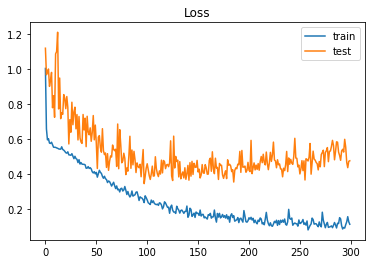

In [281]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

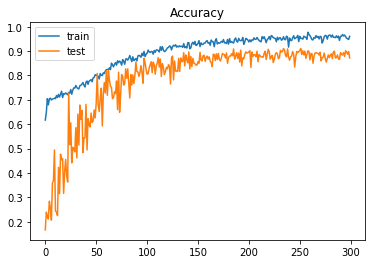

In [282]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [283]:
y_pred = model.predict_classes(X_test)
y_pred = le.inverse_transform(y_pred)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Analisando a qualidade do modelo através da matriz de confusão

In [127]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

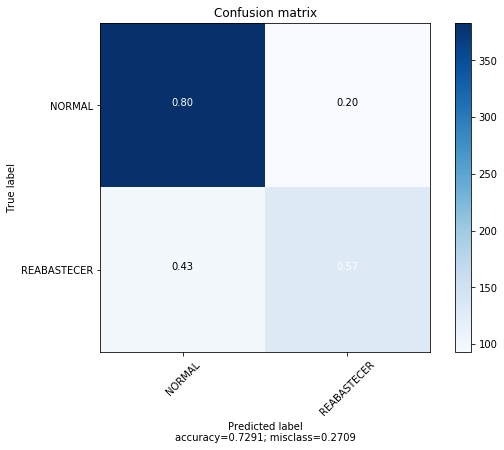

In [284]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(confusion_matrix(y_test_original, y_pred), ['NORMAL', 'REABASTECER'])

In [285]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Acurácia alcançada pela xgboost
print("Precision = {}".format(precision_score(y_test_original, y_pred, average='macro')))
print("Recall = {}".format(recall_score(y_test_original, y_pred, average='macro')))
print("Acurácia: {}".format(accuracy_score(y_test_original, y_pred)))
print("F1 Score: {}".format(f1_score(y_test_original, y_pred, average='macro')))


Precision = 0.6905396124146124
Recall = 0.6883371252431103
Acurácia: 0.7290780141843972
F1 Score: 0.6893922093739404


<hr>

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [286]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

--2020-09-10 05:30:07--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘to_be_scored.csv’

    [ <=>                                   ] 70,291      --.-K/s   in 0.003s  

2020-09-10 05:30:07 (21.5 MB/s) - ‘to_be_scored.csv’ saved [70291]



,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,2019-8-19,Hospital São Paulo,-23.5984,-46.6455,26787,34,65,28,17,33,27,6,2
980,2019-8-20,Hospital São Paulo,-23.5984,-46.6455,26629,21,60,18,15,27,22,43,43
981,2019-8-21,Hospital São Paulo,-23.5984,-46.6455,27517,9,56,13,14,21,17,37,37
982,2019-8-22,Hospital São Paulo,-23.5984,-46.6455,26860,86,49,7,14,17,12,33,33
983,2019-8-23,Hospital São Paulo,-23.5984,-46.6455,24571,74,41,65,8,14,7,27,27


In [287]:
df_to_be_scored = pd.read_csv('to_be_scored.csv')
df_to_be_scored.tail()

,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,2019-8-19,Hospital São Paulo,-23.5984,-46.6455,26787,34,65,28,17,33,27,6,2
980,2019-8-20,Hospital São Paulo,-23.5984,-46.6455,26629,21,60,18,15,27,22,43,43
981,2019-8-21,Hospital São Paulo,-23.5984,-46.6455,27517,9,56,13,14,21,17,37,37
982,2019-8-22,Hospital São Paulo,-23.5984,-46.6455,26860,86,49,7,14,17,12,33,33
983,2019-8-23,Hospital São Paulo,-23.5984,-46.6455,24571,74,41,65,8,14,7,27,27


# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "TARGET" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [288]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 13 columns):
Tempo           984 non-null object
Estação         984 non-null object
LAT             984 non-null float64
LONG            984 non-null float64
Movimentação    984 non-null int64
Original_473    984 non-null int64
Original_269    984 non-null int64
Zero            984 non-null int64
Maçã-Verde      984 non-null int64
Tangerina       984 non-null int64
Citrus          984 non-null int64
Açaí-Guaraná    984 non-null int64
Pêssego         984 non-null int64
dtypes: float64(2), int64(9), object(2)
memory usage: 100.0+ KB


<hr>

# Atenção!

# Para poder aplicar seu modelo e classificar a folha de respostas, você precisa primeiro aplicar as mesmas transformações com colunas que você aplicou no dataset de treino.

# Não remova ou adicione linhas na folha de respostas. 

# Não altere a ordem das linhas na folha de respostas.

# Ao final, as 1000 entradas devem estar classificadas, com os valores previstos em uma coluna chamada "target"

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [296]:
# 1 - Removendo linhas com valores NaN
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego'])

# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoção de colunas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação'], inplace=False)

# 4 - Encoding com "dummy variables" (se necessário)
# df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['Váriavel com dummy'])
df_to_be_scored_4 = df_to_be_scored_3

df_to_be_scored_4.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,34,65,28,17,33,27,6,2
980,21,60,18,15,27,22,43,43
981,9,56,13,14,21,17,37,37
982,86,49,7,14,17,12,33,33
983,74,41,65,8,14,7,27,27


<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [297]:
df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'
    ]
].columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'],
      dtype='object')

In [298]:
df_to_be_scored_4.columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'],
      dtype='object')

# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [299]:
y_pred = model.predict_classes(df_to_be_scored_4)
df_to_be_scored_4['TARGET'] = le.inverse_transform(y_pred)
df_to_be_scored_4.tail()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET
979,34,65,28,17,33,27,6,2,REABASTECER
980,21,60,18,15,27,22,43,43,REABASTECER
981,9,56,13,14,21,17,37,37,REABASTECER
982,86,49,7,14,17,12,33,33,REABASTECER
983,74,41,65,8,14,7,27,27,REABASTECER


### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [ ]:
project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://tnt.maratona.dev
